# Сборный проект. Определение потенциально успешной игры для интернет-магазина «Стримчик»

Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

<h1>Содержание<span class="tocSkip"></span></h1>

- [Открытие данных](#start)
- [Предобработка данных](#preprocessing)
- [Исследовательский анализ данных](#analysis)
- [Портрет пользователей](#portret)
- [Проверка гипотез](#Hypothesis_testing)
- [Общий вывод](#conclusion)

Подключим необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

## Открытие файла <a id='start'></a>

**Шаг 1.** Откроем файл с данными и изучите общую информацию

In [2]:
data = pd.read_csv('/datasets/games.csv')
display(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Описание данных**

*Name* — название игры Platform — платформа 

*Year_of_Release* — год выпуска 

*Genre* — жанр игры

*NA_sales* — продажи в Северной Америке (миллионы проданных копий) 

*EU_sales* — продажи в Европе (миллионы проданных копий)

*JP_sales* — продажи в Японии (миллионы проданных копий) 

*Other_sales* — продажи в других странах (миллионы проданных копий) 

*Critic_Score* — оценка критиков (максимум 100)

*User_Score* — оценка пользователей (максимум 10)

*Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.



In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


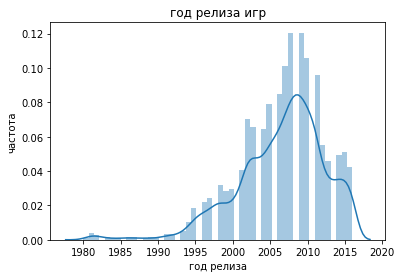

In [4]:
g_year = sns.distplot(a = data['Year_of_Release'],  kde=True, bins=50)
g_year.set_ylabel('частота')
g_year.set_xlabel('год релиза')
g_year.set_title('год релиза игр');

**Вывод**
В таблице 11 столбцов: Name — название игры Platform — платформа; Year_of_Release — год выпуска; Genre — жанр игры;
NA_sales — продажи в Северной Америке (миллионы проданных копий); EU_sales — продажи в Европе (миллионы проданных копий); JP_sales — продажи в Японии (миллионы проданных копий); Other_sales — продажи в других странах (миллионы проданных копий); Critic_Score — оценка критиков (максимум 100); User_Score — оценка пользователей (максимум 10); Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
В таблице данные за 1980-2016гг, первый активный рост количества игр приходится на 1994-2000гг, максимальный пик выпуска игр приходится на 2006-2011гг.

## Предобработка данных <a id='preprocessing'></a>

### Стиль заголовков

Выведем на экран названия столбцов.

In [5]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Переведем названия столбцов к нижнему регистру.

In [6]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков

Проверим количество пропусков данных в таблице.

In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

#### Пропуски название игр

Проверим у скольких игр пропущено значение.

In [8]:
data['name'].isna().sum()/len(data['name'])*100

0.011965300628178284

0,01% игр без указанного значение, это очень незначительный процент игр да и оценивать игры без названия невозможн, удалим из таблицы данные о играх без названия. 

In [9]:
data.dropna(subset=['name'], inplace = True)
data['name'].isna().sum()

0

#### Пропуски года выпуска

Посмотрим данные с пропусками годом выпуска

In [10]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Посмотрим информацию о одной из игру у которой пропущена информация о годе релиза.

In [11]:
data.query('name == "Madden NFL 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


У этой игры есть релизы на других платформах. Попробуем заменить пропуски о годе релиза для игр у которых есть информация о релизах на других платформах.

In [12]:
for i in data[data['year_of_release'].isnull() == True].index:  
    data['year_of_release'][i] = data.loc[data['name'] == data['name'][i], 'year_of_release'].max()

Проверим сколько пропусков осталось.

In [13]:
data['year_of_release'].isna().sum()

146

In [14]:
146/len(data['year_of_release'])*100

0.8735714713097589

0.9% данных имеют пропуски информации о годе релиза. Так как это небольшой процент данных удалим их, где смогли мы заменили пропуски данных.

In [15]:
data.dropna(subset=['year_of_release'], inplace = True)
data['year_of_release'].isna().sum()

0

#### Пропуски в оценках критиков

Посмотрим данные с пропуском оценки критиков.

In [16]:
data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Данные об оценке игр критиками отсутвуют в 8492 случаях.

Возможно эти пропуски были у непопулярных игр. Добавим столбец в таблицу в котором будут суммарные продажи во всех регионах. И потом проверим продажи игр без рейтингов.

In [17]:
data['total_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

In [18]:
data_mis_critic = data[data['critic_score'].isna()]

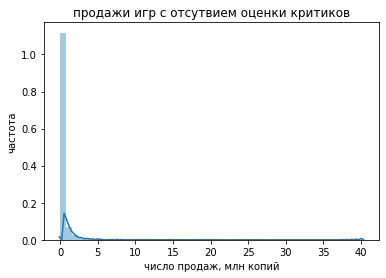

In [19]:
g_sales_mis = sns.distplot(a = data_mis_critic['total_sales'],  kde=True)
g_sales_mis.set_ylabel('частота')
g_sales_mis.set_xlabel('чиcло продаж, млн копий')
g_sales_mis.set_title('продажи игр с отсутвием оценки критиков');

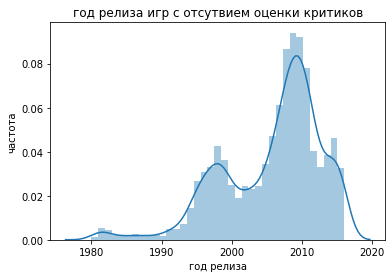

In [20]:
g_year_mis = sns.distplot(a = data_mis_critic['year_of_release'],  kde=True)
g_year_mis.set_ylabel('частота')
g_year_mis.set_xlabel('год релиза')
g_year_mis.set_title('год релиза игр с отсутвием оценки критиков');

Сначала предположила что это старые игры (для которых еще не было освещающих игр критиков) или игры 2016 года (их еще могли не успеть оценить), но на графике мы видим 2 пика отсутвия ценки игр критиков они приходятся на 1995-2000гг и 2006-2011гг, что соответсвует скачку появления новых игр в целом.

Таким образом на отсутвие рейтинга игр больше влияло то что это были непопулярные в плане продаж игры, и на них не обратили внимание критики.

Вероятно из-за резко возросшего количества игр в эти годы критики не могли оценить все игры и оценивали наиболее популярные игры.

In [21]:
data_mis_critic['user_score'].isna().sum()

6596

In [22]:
data_mis_critic['rating'].isna().sum()

6617

Большинство игр у которых отсутвуют данные о ценке критиками так же отсутвуют данные о рейтингах среди игроков и о рейтинге от организации ESRB.

На данный момент мы не можем проверить коэффециент пирсона для того что бы оценить коррелируют ли между собой оценки критиков и оценки пользователей из-за типа данных в оценке пользователей. Вернемся к этому вопросу позже, когда разберемся с типом данных в оценке пользователей и решим можем ли мы заменить пропуски в оценках критиков опираясь на оценку пользователей.

#### Пропуски в оценках пользователей

Проведем те же манипуляции для пропусков данных о оценках пользователей.

In [23]:
data_mis_user = data[data['user_score'].isna()]

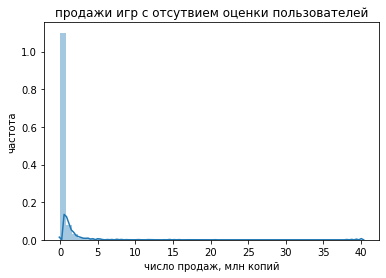

In [24]:
g_sales_mis_user = sns.distplot(a = data_mis_user['total_sales'],  kde=True)
g_sales_mis_user.set_ylabel('частота')
g_sales_mis_user.set_xlabel('чиcло продаж, млн копий')
g_sales_mis_user.set_title('продажи игр с отсутвием оценки пользователей');

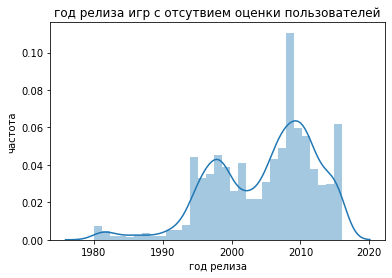

In [25]:
g_year_mis_user = sns.distplot(a = data_mis_user['year_of_release'],  kde=True)
g_year_mis_user.set_ylabel('частота')
g_year_mis_user.set_xlabel('год релиза')
g_year_mis_user.set_title('год релиза игр с отсутвием оценки пользователей');

Для игр у которых отсутвуют оценки пользователей характерна та же особенность, что и для игр у которых отсутвуют оценки критиков. Большинство этих игр имеют низкие продажи, пики игр без оценки пользователей приходятся на пики появления новых игр.

#### Пропуски в рейтинге ESRB

Проведем те же манипуляции для пропусков данных о рейтинге ESRB

In [26]:
data_mis_rating = data[data['rating'].isna()]

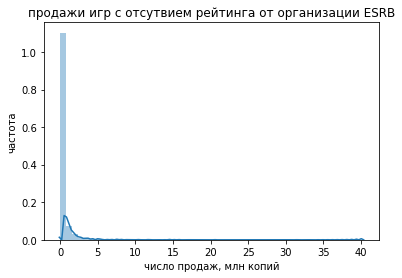

In [27]:
g_sales_mis_rating = sns.distplot(a = data_mis_rating['total_sales'],  kde=True)
g_sales_mis_rating.set_ylabel('частота')
g_sales_mis_rating.set_xlabel('чиcло продаж, млн копий')
g_sales_mis_rating.set_title('продажи игр с отсутвием рейтинга от организации ESRB');

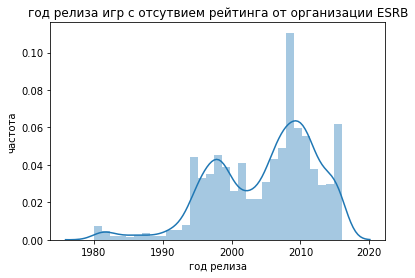

In [28]:
g_sales_mis_rating = sns.distplot(a = data_mis_user['year_of_release'],  kde=True)
g_sales_mis_rating.set_ylabel('частота')
g_sales_mis_rating.set_xlabel('год релиза')
g_sales_mis_rating.set_title('год релиза игр с отсутвием рейтинга от организации ESRB');

Для игр у которых отсутвуют рейтинги от организации ESRB характерна та же особенность, что и для игр у которых отсутвуют оценки критиков и пользователей. Большинство этих игр имеют низкие продажи, пики игр без рейтинга приходятся на пики появления новых игр.

In [29]:
 data.groupby('rating')['total_sales'].count()

rating
AO         1
E       3958
E10+    1412
EC         8
K-A        3
M       1554
RP         2
T       2930
Name: total_sales, dtype: int64

Посмотрим сколько процентов игр имеют рейтинг «Только для взрослых» (AO):

In [30]:
len(data[data['rating']=='AO'])/len(data['rating'])*100

0.006036095853202149

0.006% игр имеют рейтинг Early childhood. Заменим рейтинг AO на более распространенный и близкий по возрастной группе M (для взрослых).

In [31]:
data['rating'] = data['rating'].replace('AO', 'M')

Посмотрим сколько процентов игр имеют рейтинг Early childhood (ЕС):

In [32]:
len(data[data['rating']=='EC'])/len(data['rating'])*100

0.04828876682561719

0.04% игр имеют рейтинг Early childhood. Удалим эти игры так как они составляют пренебрежимо малую долю данных.

In [33]:
data = data[data['rating']!='EC']

Рейтинг Kids to Adults(K-A) первоначальное название рейтинга "для всех от 10 лет и старше" (E10+), заменим название K-A на E10+.

In [34]:
data['rating'] = data['rating'].replace('K-A', 'E10+')

Посмотрим сколько процентов игр имеют рейтинг "Рейтинг ожидается" (RP):

In [35]:
len(data[data['rating']=='RP'])/len(data['rating'])*100

0.01207802403526783

0.01% игр имеют рейтинг "Рейтинг ожидается" (RP). Удалим эти игры так как они составляют пренебрежимо малую долю данных.

In [36]:
data = data[data['rating']!='RP']

In [37]:
data.groupby('rating')['total_sales'].count()

rating
E       3958
E10+    1415
M       1555
T       2930
Name: total_sales, dtype: int64

<font color=#e17055>"Редкие значения рейтинга заменила на более распространенные и близкие группы или если не было похожей группы рейтинга и они составляли пренебрежимо малую долю в данных - удалила."</font>

### Работа с типами данных

Заменим тип данных в колонке год релиза (year_of_release) на целочисленный int16.

In [38]:
data['year_of_release'] = data['year_of_release'].astype('int16')

Заменим тип данных в колонке оценка пользователей (user_score) на вещественный float64.

Из-за того что в колонке есть значение tbd, не можем заменть тип данных в колонке. tbd  - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Заменим данное значение на пропуски Nan.

In [39]:
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)

In [40]:
data['user_score'] = data['user_score'].astype('float64')

Посмотрим коррелируют ли оценки пользователей и оценки критиков между собой, и если есть корреляция, заменим пропуски в оценках критиков опираясь на оценки пользователей в тех местах где это возможно.

In [41]:
data['critic_score'].corr(data['user_score'])

0.5800818081521021

Согласно коэффициенту Пирсона между оценками пользователей и оценками критиков есть средняя положительная связь. Заменим пропуски данных о оценке критиков на оценку пользователей умноженную на 10 в тех местах где это возможно. И наоборот заменим данные с пропуском оценки пользователей на оценку критиков поделенную на 10.

In [42]:
data['critic_score'] = data['critic_score'].fillna(data['user_score']*10)

In [43]:
data['user_score'] = data['user_score'].fillna(data['critic_score']/10)

<font color=#e17055>"Соглашусь, но для учебного проекта я решила что такая замена допустима."</font>

### Проверка на дубликаты.

Проверка на явные дубликаты.

In [44]:
data.duplicated().sum()

0

Проверим на неявные дубликаты в колонки platform и genre. 

In [45]:
data['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

В колонке platform неявных дубликатов не обнаружили.

In [46]:
data['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [47]:
data['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

В колонке genre неявных дубликатов не обнаружили.

**Вывод**

В ходе предобработки данных обнаружили большое количество пропусков данных о оценках критиков и пользователей, а так же рейтинге от организации ESRB. Пропуски характерны для игр с низкими продажами и пики количества пропусков соответвуют пикам количества релизов игр. Для оценки продаж игр сделали в датасете дополнительную колонку с общеми продажами (total_sales).
У некоторых игр отсутвовал год релиза на одной из платформ, заменили его на год релиза на других платформах, вероятно эти пропуски возникли из-за технической ошибки при формировании датасета.
У некоторых игр в оценке пользователей была аббревиатура  tbd (To Be Determined - будет определено), из-за этой буквенной аббревиатуры тип данных в колонке был object, заменили занчение tbd на пропуски Nan, после чего перевели данные в численный тип float64. Далее оценили корреляцию между оценкой пользователей и оценкой критиков при помощи критерия Пирсона, выявили среднюю положительную связь между данными, после чего заменили пропуски оценок критиков на оценку пользователей с поправочным коэффициентом (то же самое сделали для пропусков оценок пользователей в тех местах где была оценка критиков).

## Исследовательский анализ данных <a id='analysis'></a>

### Анализ релизов игр в разные годы

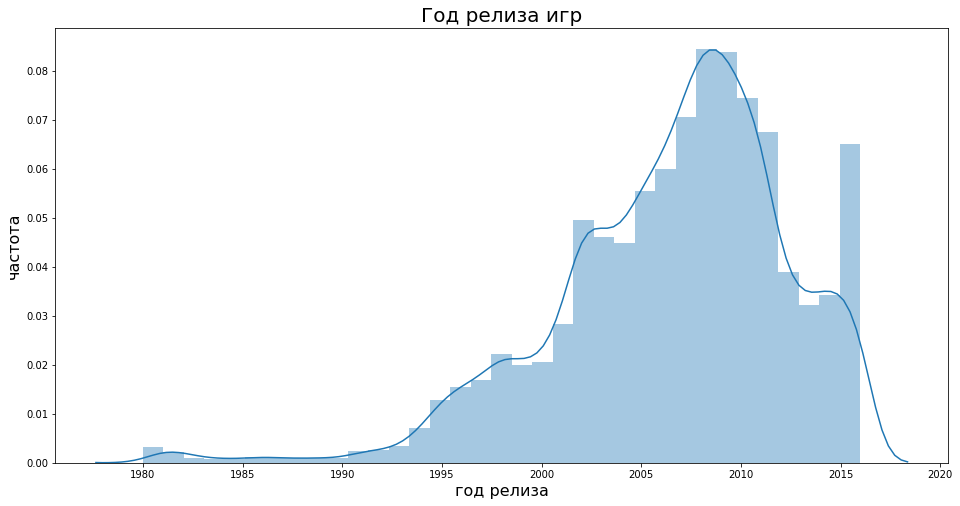

In [48]:
plt.figure(figsize=(16,8))
g_year = sns.distplot(a = data['year_of_release'],  kde=True, bins=35)
g_year.set_ylabel('частота', fontsize=16)
g_year.set_xlabel('год релиза', fontsize=16)
g_year.set_title('Год релиза игр', fontsize=20)
plt.rcParams['font.size'] = '11';

Согласно графику релиза игр мы видим возрастание количества релизов с 1994 по 2000гг, в этот период времени максимальный пик выпуска игр приходится на 2006-2011гг.

Такое количество релизов ассоциировано с выходом на рынок больших игровых платформ и сменой поколений игровых систем. Так в 1980г на рынов вышла японская фирма Nintendo, ставшая прообразом многих последующих портативных игровых систем, и другие сходные системы, как Sega Master System (1985) или Atari 7800 (1986).

В 1994-1996 года вышли игровые системы 5 поколения - Sega Saturn (1994), Sony PlayStation (1994) и Nintendo 64 (1996). Эта эпоха началась в 1993 году и закончилась в 2006-м. 

В 1998 начали выпускаться игровые системы 6 поколения, популярность приобретают относится к компьютерные игры, игровые приставки, а также наладонные игровые устройства. Эта эпоха началась 27 ноября 1998 года, с выпуском Dreamcast, после которой, в марте 2000 была выпущена PlayStation 2. В марте 2001 года производство Dreamcast было прекращено, и в том же году начались продажи Nintendo GameCube — в сентябре, и Xbox — в ноябре.

в 2005-2007 годах стало выходить 7 поколение игровых система вышла приставка PlayStation 3, в 2005 вышла приставка  Microsoft Xbox 360, в конце 2006 года - консоли от Nintendo (Wii) и Sony (PlayStation 3).

К 2010-м годам игровым приставкам пришлось прямо конкурировать не только с персональными компьютерами, но со смартфонами, планшетами и телевизорами Smart TV, постоянно подключёнными к интернету. В целом это начало приводить к угасанию популярности десктопных вариантов игр и к развитию мобольных игр и плеймаркетов.

### Анализ продаж игр по платформам.

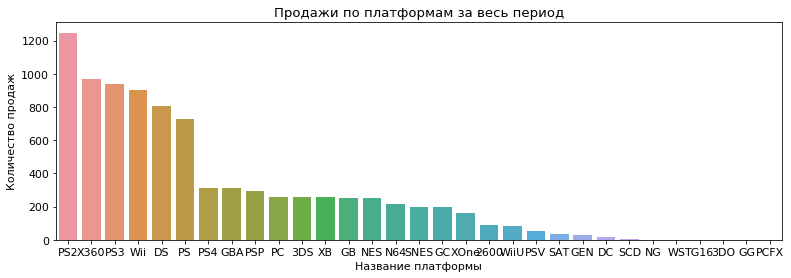

In [49]:
sales_on_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)

plt.figure(figsize=(13,4))
sns.barplot(x=sales_on_platform.index,y=sales_on_platform['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж");

Из графика видно, что самые популярные игровые платформы за наблюдаемый период это PS2, X360, PS3, WII, DS, PS, PS4, GBA, PSP, PC.

Создадим сводную таблицу с суммарными продажами по платформам

In [50]:
sales_on_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)

Выделим в топ-10 платформы у которых были наибольшие суммарные продажи.

In [51]:
top_platforms = sales_on_platform.head(10)
top_platforms

,total_sales
platform,
PS2,1246.92
X360,966.61
PS3,935.19
Wii,902.65
DS,803.63
PS,727.58
PS4,314.14
GBA,313.73
PSP,293.57


Создадим список платформ входящих в топ суммарных продаж.

In [52]:
top_platforms_list=top_platforms.index
top_platforms_list

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', 'PC'], dtype='object', name='platform')

Построим график суммарных продаж для платформ из списка топ продаж по годам.

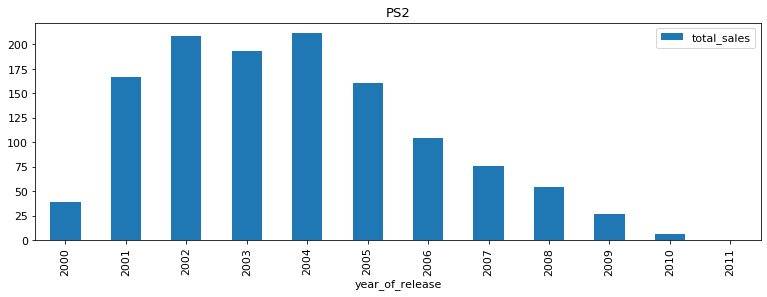

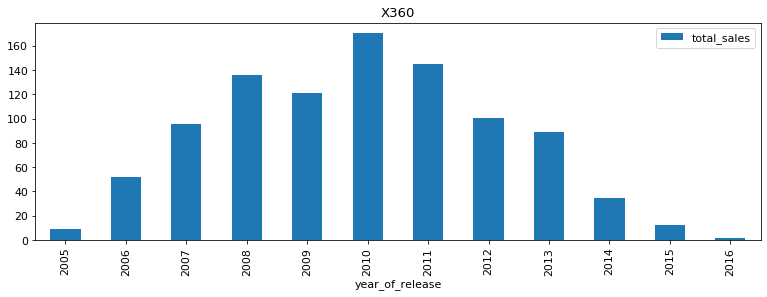

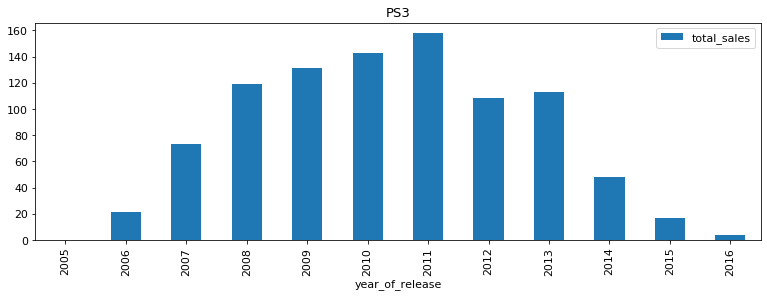

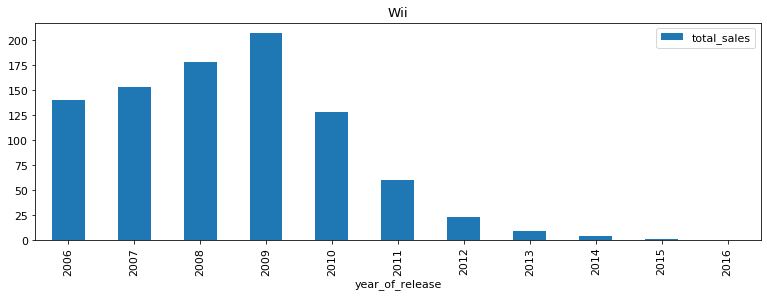

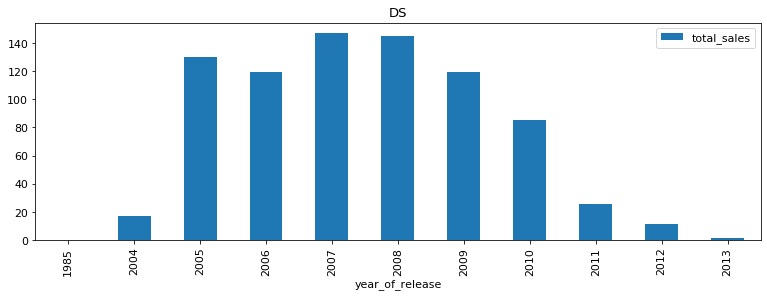

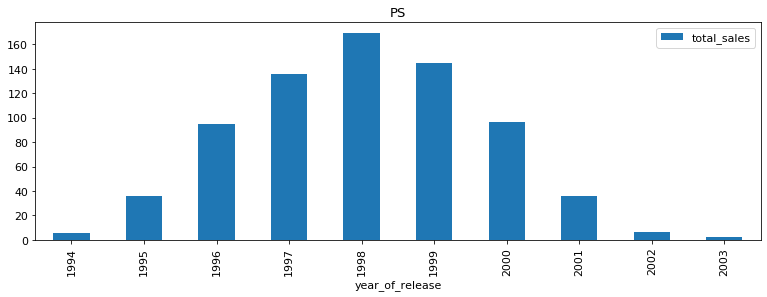

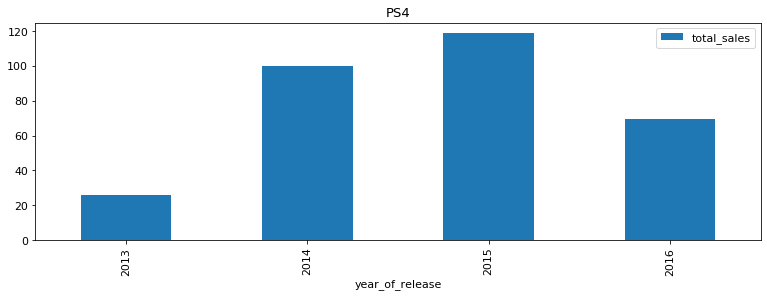

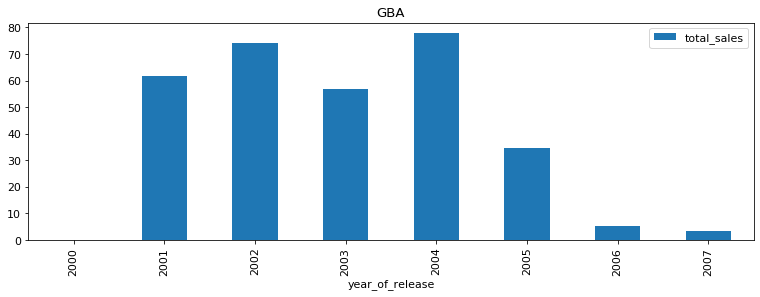

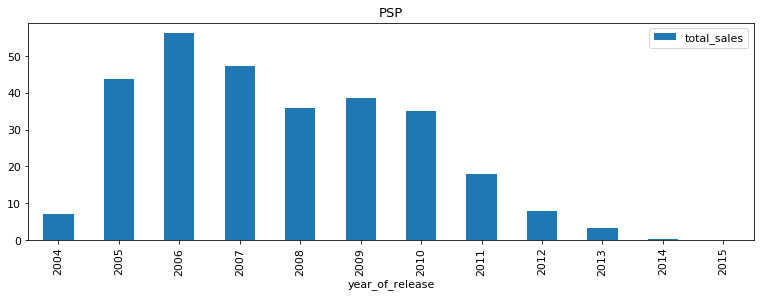

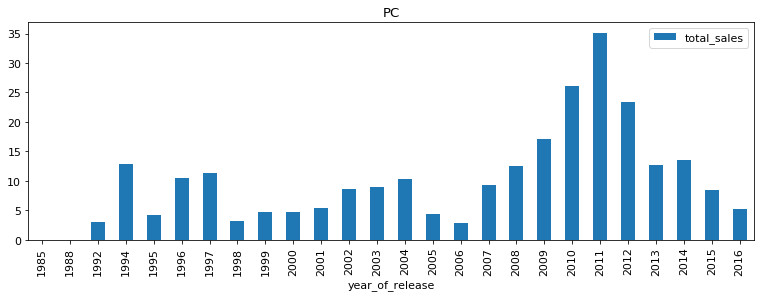

In [53]:
for platform in top_platforms_list:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(13,4))
    plt.title(platform)

Таким образом в топ-10 платформ продаж игр вошли PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP и PC. 

На 2016 год только PS4 и РС не дошли до минимума продаж и сохраняют свою популярность среди лидеров топ-10. 

В среднем для появления и исчезновения новой платформы нужно 5-8 лет. При этом выдяляютя игры для персональных компьютеров было несколько пиков продаж и которые сохраняют свою популярность на протяжении всего изучаемого срока.

### Анализ продаж игр по платформам за актуальный период исследования.

Так как для повявления и исчезновения платформы нужно 5-8 лет возьмем для построения прогноза на 2017 год игры появившиеся после 2009 года.

In [54]:
actual_period_data = data[data['year_of_release'] > 2013]

Создадим сводную таблицу с платформами и продажами на них для данных с актуальным периодом исследования.

In [55]:
sales_on_platform_actual = actual_period_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)

Выделим топ-10 самых продоваемых платформ за актуальный период исследования.

In [56]:
top_platforms_actual = sales_on_platform_actual.head(10)
top_platforms_actual

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.40
PSV,22.40
Wii,5.07


Создадим список топ-10 платформ за актуальный период исследования.

In [57]:
top_platforms_actual_list=top_platforms_actual.index
top_platforms_actual_list

Index(['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP'], dtype='object', name='platform')

Для топ-10 платформ за актуальный период исследования нарисуем графики для наглядного отоборажения продаж и последующего выделения потенциально прибыльных платформ.

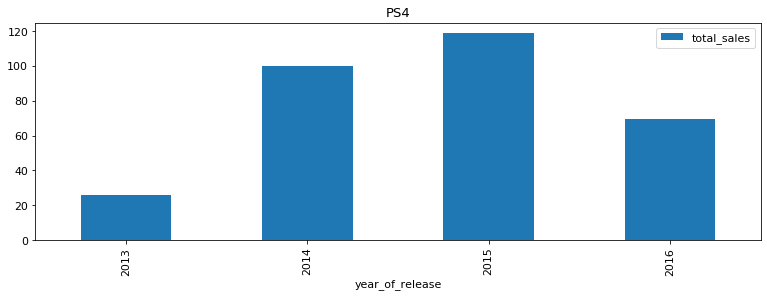

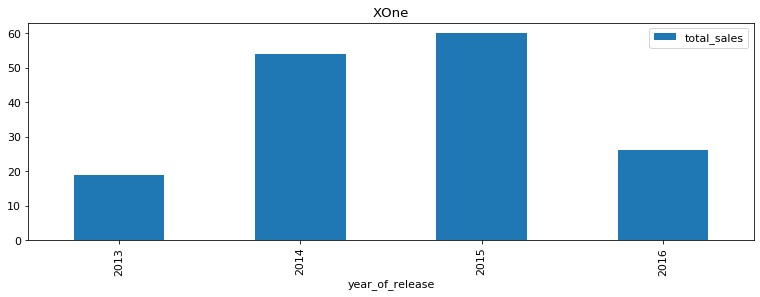

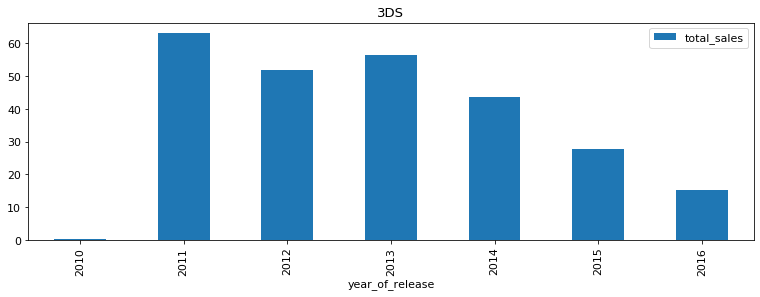

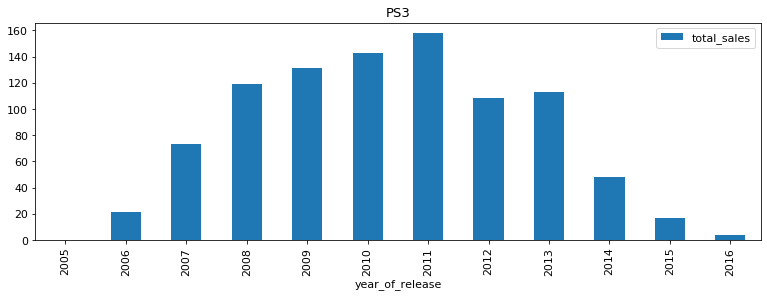

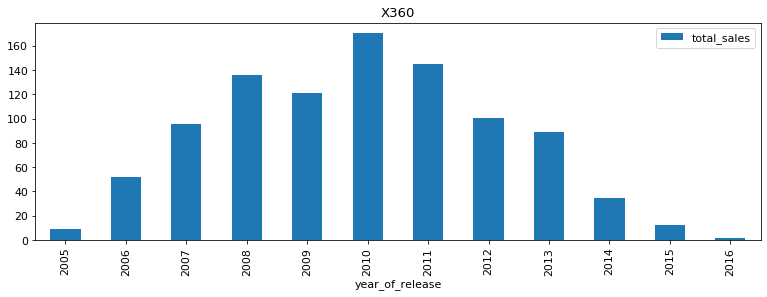

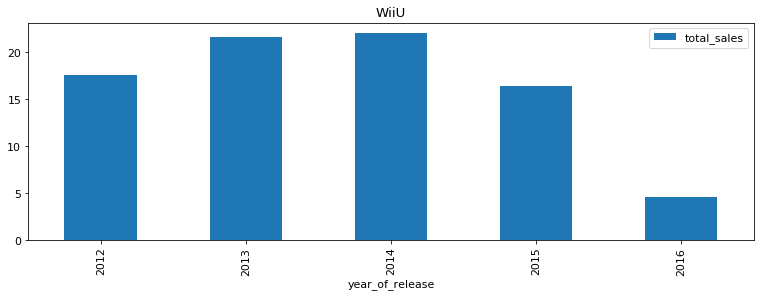

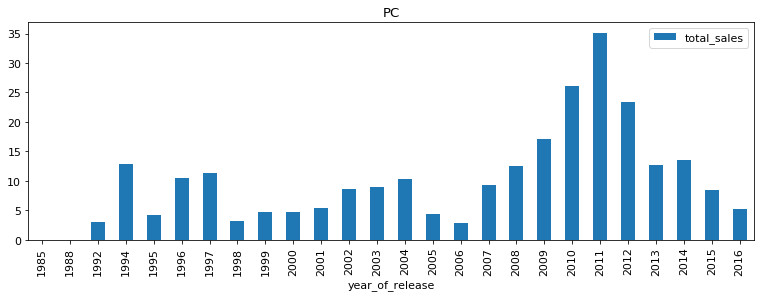

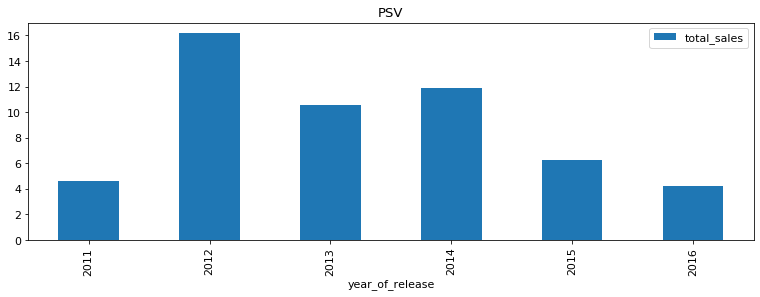

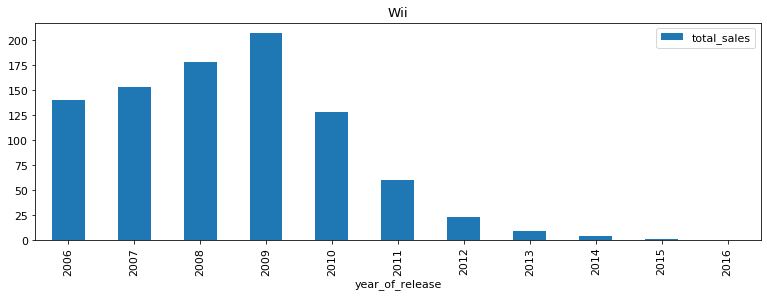

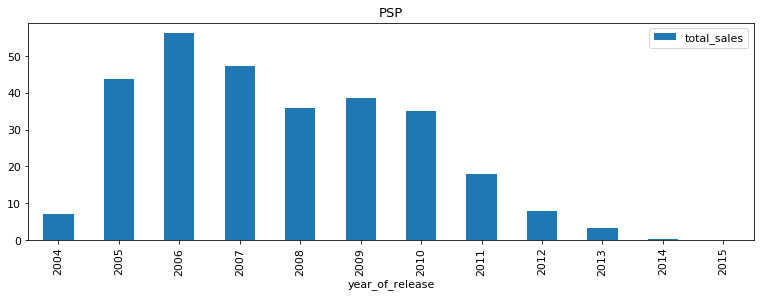

In [58]:
for platform in top_platforms_actual_list:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(13,4))
    plt.title(platform)

В топ продаж за 2013-2016 года вошли PS3, X360, PS4, 3DS, Wii, XOne, DS, PC, WiiU, PSP. PS3, X360, Wii, DS, PSP не смотря на то что приносили самые высокие продажи уже находятся на излете своей популярности. 
К потенциально прибыльным платформам отнесем PS4, 3DS, XOne, PC, WiiU.

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [59]:
short_list = ['PS4','XOne', '3DS', 'PC', 'WiiU']
games_short_list = actual_period_data[actual_period_data['platform'].isin(['PS4','XOne', '3DS', 'PC', 'WiiU'])]

In [60]:
games_short_list['total_sales'].describe()

count    1041.000000
mean        0.562507
std         1.271580
min         0.010000
25%         0.040000
50%         0.130000
75%         0.470000
max        14.630000
Name: total_sales, dtype: float64

Удалим выбросы продаж из нашего короткого листа согласно правилу 3 сигм.

In [61]:
games_short_list = games_short_list[games_short_list['total_sales']<(0.52+3*1.23)]

In [62]:
games_short_list.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,209.0,0.288565,0.586757,0.01,0.03,0.08,0.2400,3.89
PC,152.0,0.180263,0.328559,0.01,0.02,0.06,0.2050,3.05
PS4,362.0,0.515663,0.822260,0.01,0.05,0.17,0.6075,4.07
WiiU,70.0,0.379714,0.519785,0.01,0.05,0.17,0.5175,3.21
XOne,223.0,0.509103,0.756497,0.01,0.05,0.18,0.5950,3.66


Text(0, 0.5, 'Глобальные продажи')

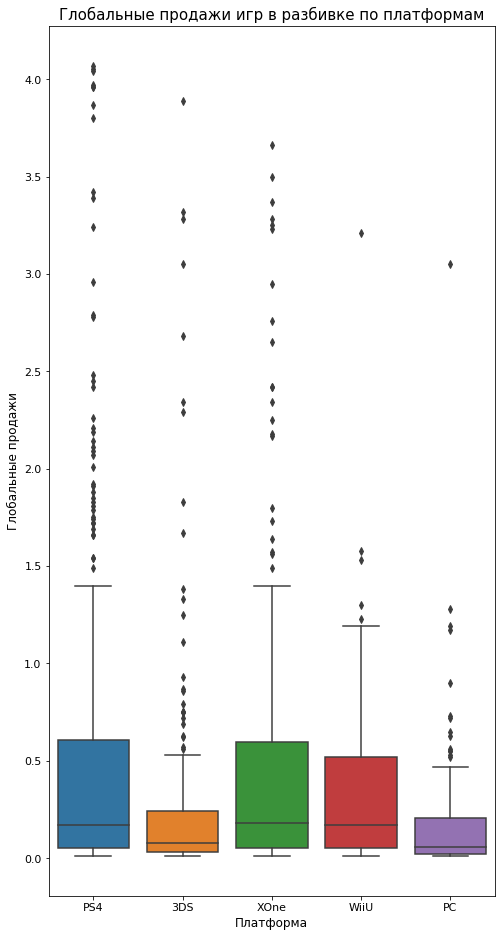

In [63]:
plt.figure(figsize=(8,16))
sns.boxplot(data=games_short_list, x='platform', y='total_sales')
plt.title('Глобальные продажи игр в разбивке по платформам', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

Таким образом 5 наиболее перспектиные платформы игр - PS4, 3DS, XOne, PC, WiiU. Это наиболее молодые игровые платформы в нашем списке платформ, учитывая срок популярности платформ 5-8 лет, игры на этих платформах будут популярны и в 2017 году и игры для персональных компьютеров популярность которых меняется, но не сходит на нет и эти игры так же остаются актуальными . При этом суммарные продажи у PS4, XOnе и WiiU в среднем в 2 раза выше, чем у 3DS и PC за период с 2009 по 2016 года. Нинтендо 3DS является портативной консолью и она пользовалась значительно меньше популярностью по вравнению с PS4 и  XOnе. У игр для ПК суммарные продажи меняются со временем, но данная платформа не теряет своей актуальности, так как для данных игр не нужно приобретать дополнительного оборудования к компьютерам, которые имеются практически у всех пользователей.

In [64]:
sony_play_station4 = data[data['platform']=='PS4']

In [65]:
sony_play_station4['user_score'].corr(sony_play_station4['total_sales'])

-0.03245864836371189

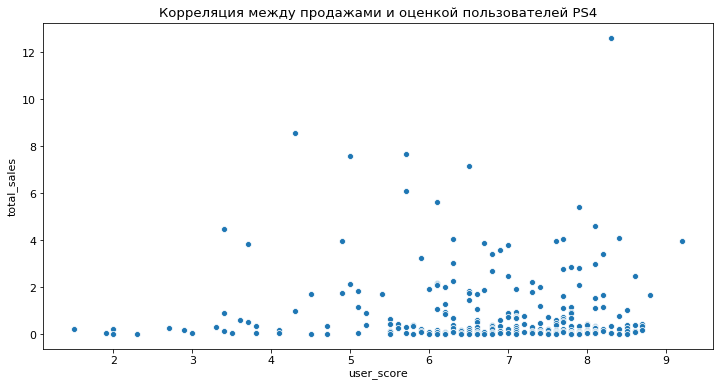

In [66]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=sony_play_station4)
plt.title('Корреляция между продажами и оценкой пользователей PS4');

Взаимосвязь между суммарными продажами игр и оценками пользователей отсутвуют. Как пользователи не оценивают более благосклонно популярные игры, так и высокие средние оценки пользователей не вызывают усиление продаж.

In [67]:
sony_play_station4['critic_score'].corr(sony_play_station4['total_sales'])

0.40090322359256714

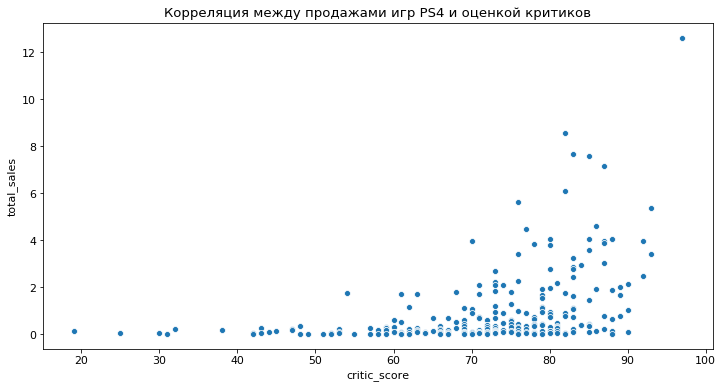

In [68]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=sony_play_station4)
plt.title('Корреляция между продажами игр PS4 и оценкой критиков');

Между оценкой критиков и суммарными продажами игр на PS4 существует средняя положительная связь. У игр с более высоким средним рейтингом от критиков выше суммарные продажи.

### Влияние отзывов пользователей и критиков на продажи внутри других популярных платформ.

In [69]:
def other_platform_matrix(name_of_platform):
    platform = actual_period_data[actual_period_data['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    correl = platform['user_score'].corr(platform['total_sales'])
    critic_correl = platform['critic_score'].corr(platform['total_sales'])
    print('Корреляция между отзывами пользователей и продажами ', name_of_platform, correl)
    print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform, critic_correl)

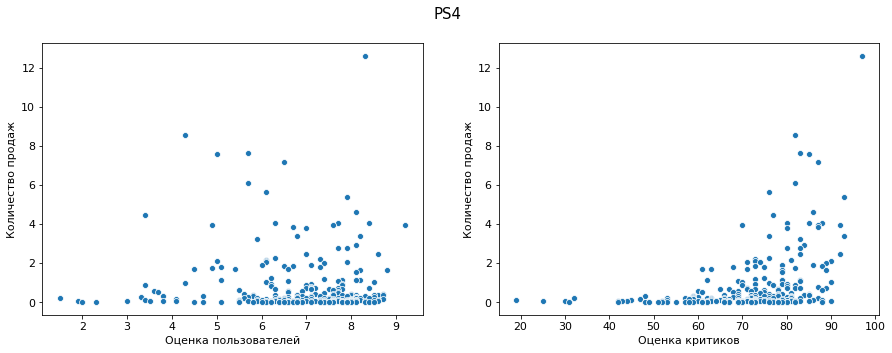

Корреляция между отзывами пользователей и продажами  PS4 -0.04029170978314622
Корреляция между отзывами критиков и игровой платформой  PS4 0.3963095483373523


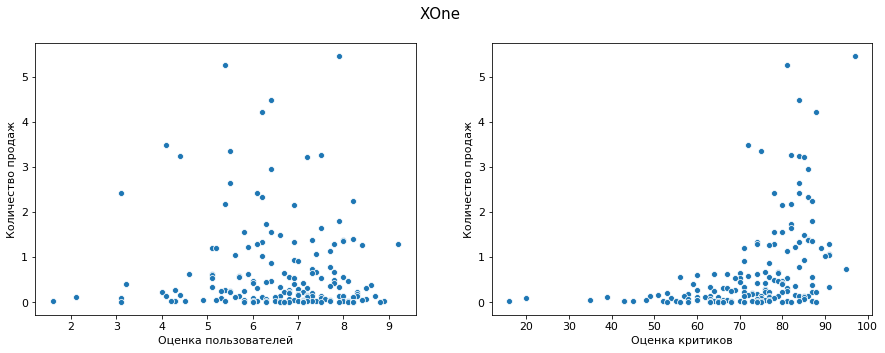

Корреляция между отзывами пользователей и продажами  XOne -0.06425889090697248
Корреляция между отзывами критиков и игровой платформой  XOne 0.41578022087320976


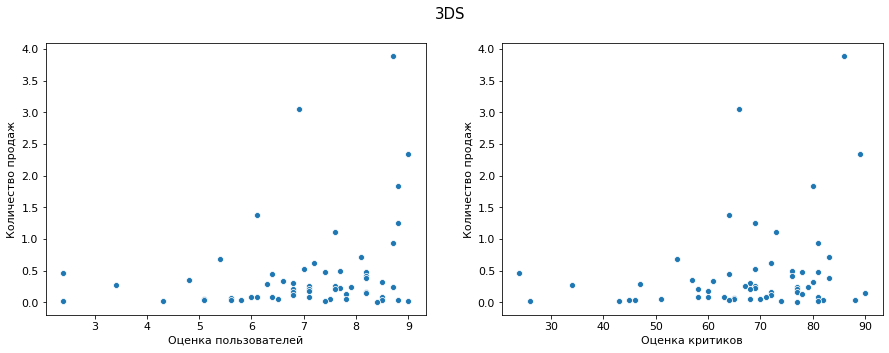

Корреляция между отзывами пользователей и продажами  3DS 0.24476097861343607
Корреляция между отзывами критиков и игровой платформой  3DS 0.23987998509543296


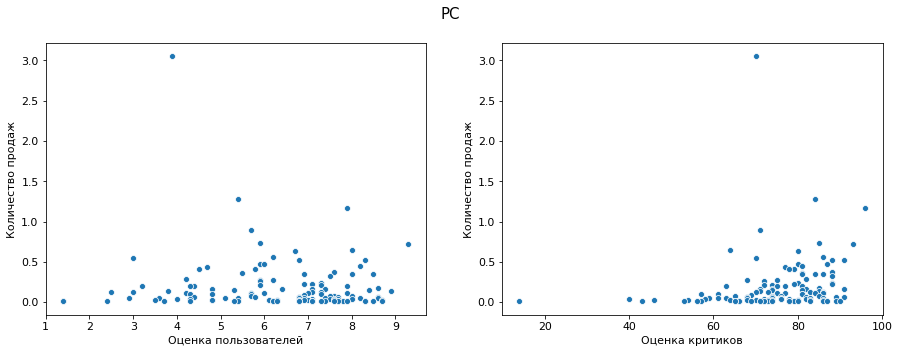

Корреляция между отзывами пользователей и продажами  PC -0.06733668097984426
Корреляция между отзывами критиков и игровой платформой  PC 0.18876913484837154


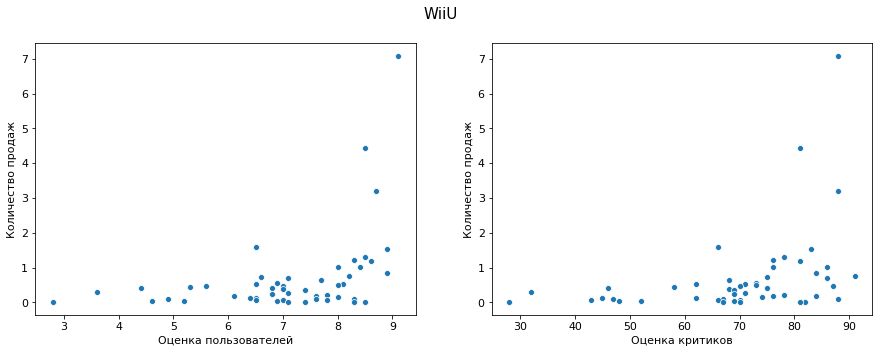

Корреляция между отзывами пользователей и продажами  WiiU 0.40339283762180134
Корреляция между отзывами критиков и игровой платформой  WiiU 0.37192960153413274


In [70]:
for platform in short_list:
    other_platform_matrix(platform)

Так же как и у PS4 у продаж игр для XOne и PC не взаимосвязаны с оценками игроков, но имеется средняя положительная связь с оценками критиков. У игр с более высокими оценками критиков были более высокие продажи.

У игр для платформ 3DS и WiiU есть средняя положительная взаимоствязь между продажами и обоими видами оценок.

Таким образом продажи игр для PS4, XOne и PC взаимосвязаны с рейтинговыми оценками критиков, а продажи игр для 3DS и WiiU взаимосвязаны как с оценками критиков, так и с оценками пользователей.

### Анализ жанров игр.

In [71]:
distr_genre = games_short_list.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)

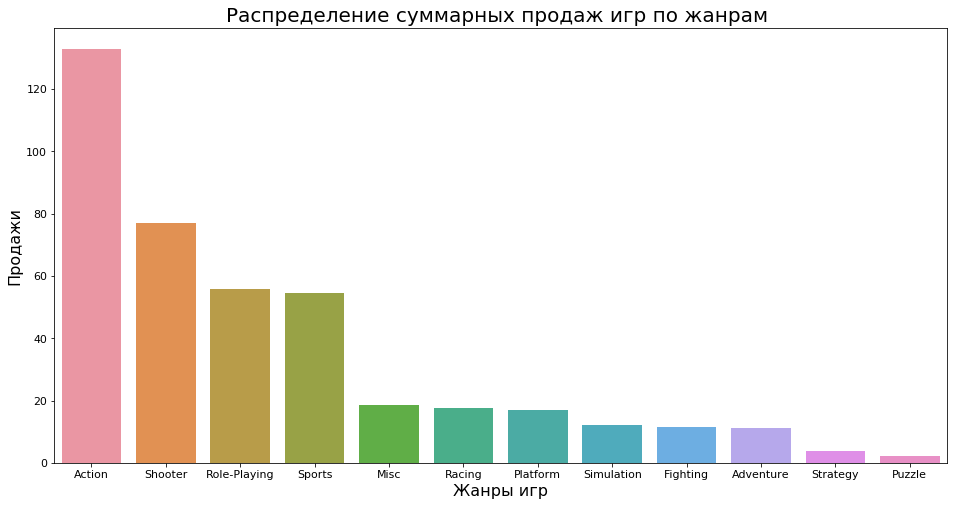

In [72]:
plt.figure(figsize=(16,8))
plt.title('Распределение суммарных продаж игр по жанрам ',fontsize=20)
sns.barplot(data=distr_genre, x='genre', y='total_sales')
plt.rcParams['font.size'] = '11'
plt.xlabel('Жанры игр',fontsize=16)
plt.ylabel('Продажи',fontsize=16);

Посмотрим описательную статистику суммарных продаж игр по жанрам.

In [73]:
games_short_list.groupby('genre')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,381.0,0.349055,0.639494,0.01,0.0400,0.110,0.3500,4.05
Adventure,74.0,0.150676,0.281796,0.01,0.0200,0.060,0.1300,1.66
Fighting,29.0,0.398621,0.601461,0.02,0.0600,0.150,0.3400,2.78
Misc,71.0,0.263099,0.415082,0.01,0.0300,0.100,0.3800,2.76
Platform,29.0,0.584483,0.791962,0.02,0.0900,0.190,1.0200,3.21
Puzzle,11.0,0.191818,0.357262,0.01,0.0200,0.060,0.1100,1.19
Racing,49.0,0.361020,0.585947,0.01,0.0300,0.100,0.3600,2.42
Role-Playing,124.0,0.449516,0.707821,0.01,0.0600,0.175,0.5400,3.97
Shooter,88.0,0.876364,1.058802,0.01,0.1400,0.440,1.2025,4.07


Можно отметить что среднее и медиана суммарных продаж различаются примерно в 2 раза, это косвенный признак того что распределение признака не нормальное, поэтому в качестве меры центральной тенденции будем брать медиану.

In [74]:
distr_genre_median = games_short_list.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(
    by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)

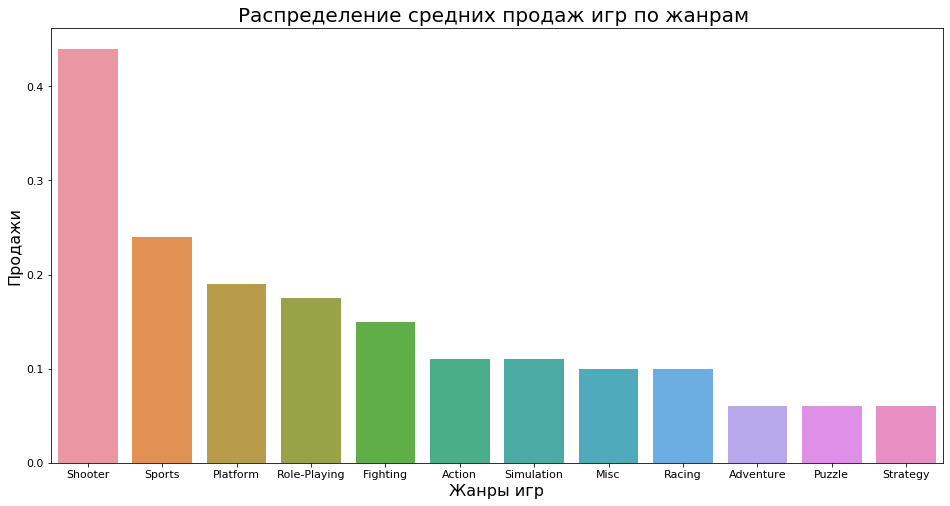

In [75]:
plt.figure(figsize=(16,8))
plt.title('Распределение средних продаж игр по жанрам ',fontsize=20)
sns.barplot(data=distr_genre_median, x='genre', y='total_sales')
plt.rcParams['font.size'] = '11'
plt.xlabel('Жанры игр',fontsize=16)
plt.ylabel('Продажи',fontsize=16);

Наибольшие суммарный продажи у игр жанров экшн и шутер, самые низкие суммарные продажи у пазлов и стратегий.

Если говорить о средних продажах, то наиболее стабильный доход приносят игры жанров шутер и спорт, самые низкие средние продажи так же продажи у игр пазл и стратегий.

**Вывод по исследовательскому анализу**

Игровые платформы с наибольшими суммарными продажами  за весь наблюдаемый период (1980-2016гг) это несколько поколений PlayStation (PlayStation (PS), PlayStation 2 (PS2), PlayStation 3 (PS3), PlayStation 4 (PS4)),  Xbox 360  (X360),  Nintendo Wii  (Wii), Nintendo DS (DS), Game Boy Advancе (GBA).

В среднем игровые платформы пользуются популярностью 5-8 лет, исходя из этого для прогноза на 2017 год выделили актуальны период для исследования 2013-2016 гг. 

В топ продаж за 2013-2016 года вошли PlayStation 3 и PlayStation 4, Xbox 360 и  Xbox One, Nintendo 3DS и Nintendo Wii. PS3, X360, Wii не смотря на то что приносили самые высокие продажи уже находятся на излете своей популярности. К потенциально прибыльным платформам отнесем более новые поколения PS4, 3DS, XOne и игры для персональных компьютеров, котрые не смотря на изменчивость своей популярности остаются актуальными.

Если говорить о влиянии рейтинговых оценок пользователей и критиков на суммарные продажи игр, то на продажи игр для PS4, XOne и PC из рейтинговых оценок влияли только оценки критиков, а на продажи игр для 3DS и оценки критиков и оценки пользователей.

<font color=#e17055>"И самые большие суммарные продажи приносили игры жанров экшн и шутер, игры жанра пазл принесли в сумме меньше всего продаж. Если делать ставку на стабильно продаваемые игры, то в среднем лучше всего продавались шутер и спорт.</font>

## Портрет пользователя каждого региона <a id='portret'></a>

### Пользователи Северной Америки

#### Оценим популярность игровых платформ среди пользователей из Северной Америки

Создадим сводную таблицу по суммарным продажам в Северной Америке на разных игровых платформах. Выделим 5 самых популярных платформ и рассчитаем долю от общих продаж для каждой из платформ.

In [76]:
pivot_na_sales_platform = actual_period_data.pivot_table(index='platform', values= 'na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).reset_index()
total_na = pivot_na_sales_platform['na_sales'].sum()
top_5_na_platform = pivot_na_sales_platform.head(5)
top_5_na_platform['part']=top_5_na_platform['na_sales']/total_na*100
other_platform = {'platform':'Other', 'na_sales':(total_na - top_5_na_platform['na_sales'].sum()), 'part': (100-top_5_na_platform['part'].sum())}
top_5_na_platform = top_5_na_platform.append(other_platform, ignore_index=True)
display(top_5_na_platform)

,platform,na_sales,part
0,PS4,98.61,34.707166
1,XOne,81.27,28.604111
2,X360,28.30,9.960580
3,3DS,22.64,7.968464
4,PS3,22.05,7.760805
5,Other,31.25,10.998874


Построим круговую диаграмму доли продаж топовых платформ

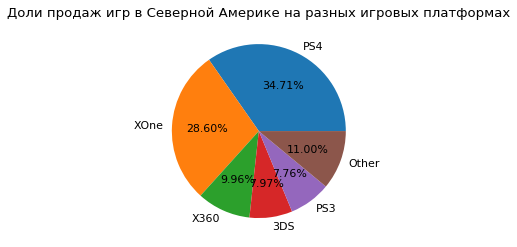

In [77]:
pie_na_platf = plt.pie(top_5_na_platform['part'], labels=top_5_na_platform['platform'], autopct='%1.2f%%')
plt.title('Доли продаж игр в Северной Америке на разных игровых платформах');

*Таким образом для жителей Северной Америки самыми популярными были платформы PS4 (35% от общего числа продаж),  XOne (29% от общего числа продаж), X360 (10%  от общего числа продаж), 3DS (8% от общего числа продаж), PS3 (8%  от общего числа продаж).*

#### Оценим популярность игр разных жанров среди пользователей из Северной Америки

Создадим сводную таблицу по суммарным продажам в Северной Америке игр разных жанров. Выделим 5 самых популярных жанров и рассчитаем долю от общих продаж для каждой из жанров.

In [78]:
pivot_na_sales_genre = actual_period_data.pivot_table(index='genre', values= 'na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).reset_index()
top_5_na_genre = pivot_na_sales_genre.head(5)
top_5_na_genre['part']=top_5_na_genre['na_sales']/total_na*100
other_genre = {'genre':'Other', 'na_sales':(total_na - top_5_na_genre['na_sales'].sum()), 'part': (100-top_5_na_genre['part'].sum())}
top_5_na_genre = top_5_na_genre.append(other_genre, ignore_index=True)
display(top_5_na_genre)

,genre,na_sales,part
0,Shooter,79.02,27.812192
1,Action,72.59,25.549064
2,Sports,46.13,16.236097
3,Role-Playing,33.47,11.780234
4,Misc,15.05,5.297058
5,Other,37.86,13.325355


Построим круговую диаграмму доли продаж игр разных жанров.

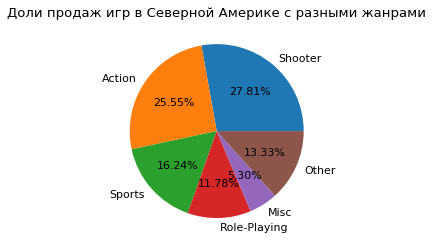

In [79]:
pie_na_genre = plt.pie(top_5_na_genre['part'], labels=top_5_na_genre['genre'], autopct='%1.2f%%')
plt.title('Доли продаж игр в Северной Америке с разными жанрами');

*Таким образом для жителей Северной Америки самыми популярными были игры жанра шутер (28%  от общего числа продаж), экшн (25,5%  от общего числа продаж),  спорт (16% от общего числа продаж), ролевые игры (12% от общего числа продаж), музыкальные (5% от общего числа продаж).*

#### Оценим популярность игр разных рейтингов ESRB среди пользователей из Северной Америки

Создадим сводную таблицу по суммарным продажам в Северной Америке игр разных рейтингов ESRB. Выделим 5 самых популярных рейтингов ESRB и рассчитаем долю от общих продаж для каждой из рейтингов ESRB.

In [80]:
pivot_na_sales_rating = actual_period_data.pivot_table(index='rating', values= 'na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).reset_index()
top_5_na_rating = pivot_na_sales_rating.head(5)
top_5_na_rating['part']=top_5_na_rating['na_sales']/total_na*100
other_rating = {'rating':'without', 'na_sales':(total_na - top_5_na_rating['na_sales'].sum()), 'part': (100-top_5_na_rating['part'].sum())}
top_5_na_rating = top_5_na_rating.append(other_rating, ignore_index=True)
display(top_5_na_rating)

,rating,na_sales,part
0,M,96.48,33.957483
1,E,50.74,17.858651
2,T,38.95,13.708996
3,E10+,33.23,11.695762
4,without,64.72,22.779107


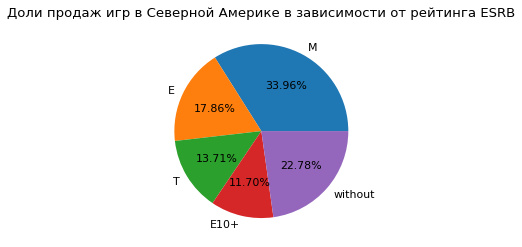

In [81]:
pie_na_rating = plt.pie(top_5_na_rating['part'], labels=top_5_na_rating['rating'], autopct='%1.2f%%')
plt.title('Доли продаж игр в Северной Америке в зависимости от рейтинга ESRB');

*Таким образом для жителей Северной Америки самыми популярными были игры с рейтингом ESRB  M	(Mature) игры для взрослых (34% от общего числа продаж), далее игры с рейтингом E («Everyone») — «Для всех» (18% от общего числа продаж), E10+ («Everyone 10 and older») — «Для всех от 10 лет и старше» (12% от общего числа продаж), Т («Teen») — «Подросткам» (13% от общего числа продаж) и 23% игр без опредленного рейтинга.*

### Пользователи в Европе

#### Оценим популярность игровых платформ среди пользователей из Европы

Создадим сводную таблицу по суммарным продажам в Европе на разных игровых платформах. Выделим 5 самых популярных платформ и рассчитаем долю от общих продаж для каждой из платформ.

In [82]:
pivot_eu_sales_platform = actual_period_data.pivot_table(index='platform', values= 'eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).reset_index()
total_eu = pivot_eu_sales_platform['eu_sales'].sum()
top_5_eu_platform = pivot_eu_sales_platform.head(5)
top_5_eu_platform['part']=top_5_eu_platform['eu_sales']/total_eu*100
other_platform = {'platform':'Other', 'eu_sales':(total_eu - top_5_eu_platform['eu_sales'].sum()), 'part': (100-top_5_eu_platform['part'].sum())}
top_5_eu_platform = top_5_eu_platform.append(other_platform, ignore_index=True)
display(top_5_eu_platform)

,platform,eu_sales,part
0,PS4,130.04,47.997638
1,XOne,46.25,17.070830
2,PS3,25.54,9.426789
3,PC,18.22,6.724984
4,3DS,16.12,5.949876
5,Other,34.76,12.829882


Построим круговую диаграмму доли продаж топовых платформ

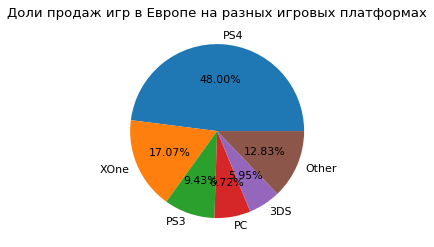

In [83]:
pie_eu_platf = plt.pie(top_5_eu_platform['part'], labels=top_5_eu_platform['platform'], autopct='%1.2f%%')
plt.title('Доли продаж игр в Европе на разных игровых платформах');

*Таким образом для жителей Европы самыми популярными были платформы  PS4 (48%  от общего числа продаж), XOne (17%  от общего числа продаж),  PS3 (9% от общего числа продаж), PC (7% от общего числа продаж), 3DS (6% от общего числа продаж).
То есть в отличии от жителей Северной Америки клиенты из Европы примерно в равных долях отдавали предпочтения играм на приставках PS4, XOne и значительно меньше PS3. Достаточно популярный в Америке X360 не вошел в топ платформ для Европы, но зато в топ платформ появились персональные компьютеры.*


#### Оценим популярность разных игровых жанров среди пользователей из Европы

In [84]:
pivot_eu_sales_genre = actual_period_data.pivot_table(index='genre', values= 'eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).reset_index()
top_5_eu_genre = pivot_eu_sales_genre.head(5)
top_5_eu_genre['part']=top_5_eu_genre['eu_sales']/total_eu*100
other_genre = {'genre':'Other', 'eu_sales':(total_eu - top_5_eu_genre['eu_sales'].sum()), 'part': (100-top_5_eu_genre['part'].sum())}
top_5_eu_genre = top_5_eu_genre.append(other_genre, ignore_index=True)
display(top_5_eu_genre)

,genre,eu_sales,part
0,Action,74.93,27.656590
1,Shooter,65.52,24.183368
2,Sports,45.73,16.878899
3,Role-Playing,28.17,10.397520
4,Racing,14.13,5.215369
5,Other,42.45,15.668254


Построим круговую диаграмму доли продаж игр разных жанров.

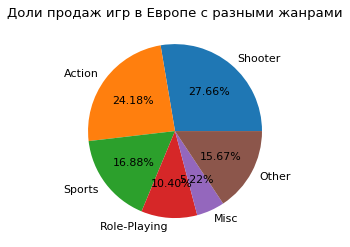

In [85]:
pie_eu_genre = plt.pie(top_5_eu_genre['part'], labels=top_5_na_genre['genre'], autopct='%1.2f%%')
plt.title('Доли продаж игр в Европе с разными жанрами');

*Таким образом для жителей Европы самыми популярными были игры жанра шутер (28%  от общего числа продаж), экшн (25%  от общего числа продаж),  спорт (17% от общего числа продаж), ролевые игры (10% от общего числа продаж), музыкальные (5% от общего числа продаж), .*

*Топ-5 популярных жанров в Европе и Северной Америке оказался идентичным, как и соотношение продаж топовых игр к продажам в целом.*

#### Оценим популярность игр разных рейтингов ESRB среди пользователей из Европы

Создадим сводную таблицу по суммарным продажам в Европе игр разных рейтингов ESRB. Выделим 5 самых популярных рейтингов ESRB и рассчитаем долю от общих продаж для каждой из рейтингов ESRB.

In [86]:
pivot_eu_sales_rating = actual_period_data.pivot_table(index='rating', values= 'eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).reset_index()
top_5_eu_rating = pivot_eu_sales_rating.head(5)
top_5_eu_rating['part']=top_5_eu_rating['eu_sales']/total_eu*100
other_rating = {'rating':'without', 'eu_sales':(total_eu - top_5_eu_rating['eu_sales'].sum()), 'part': (100-top_5_eu_rating['part'].sum())}
top_5_eu_rating = top_5_eu_rating.append(other_rating, ignore_index=True)
display(top_5_eu_rating)

,rating,eu_sales,part
0,M,93.69,34.580888
1,E,58.06,21.429890
2,T,34.07,12.575204
3,E10+,26.16,9.655631
4,without,58.95,21.758388


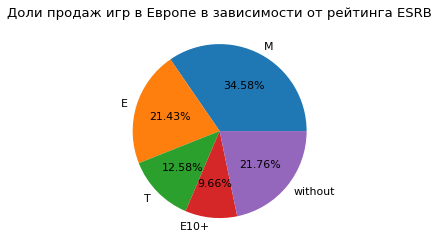

In [87]:
pie_eu_rating = plt.pie(top_5_eu_rating['part'], labels=top_5_eu_rating['rating'], autopct='%1.2f%%')
plt.title('Доли продаж игр в Европе в зависимости от рейтинга ESRB');

*Таким образом для жителей Европы как и для пользователей из Северной Америки самыми популярными были игры с рейтингом ESRB  M	(Mature) игры для взрослых (35% от общего числа продаж), далее игры с рейтингом E («Everyone») — «Для всех» (21% от общего числа продаж), E10+ («Everyone 10 and older») — «Для всех от 10 лет и старше» (10% от общего числа продаж), Т («Teen») — «Подросткам» (13% от общего числа продаж) и 22% игр без опредленного рейтинга.*

### Пользователи в Японии

#### Оценим популярность игровых платформ среди пользователей из Японии

Создадим сводную таблицу по суммарным продажам в Японии на разных игровых платформах. Выделим 5 самых популярных платформ и рассчитаем долю от общих продаж для каждой из платформ.

In [88]:
pivot_jp_sales_platform = actual_period_data.pivot_table(index='platform', values= 'jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).reset_index()
total_jp = pivot_jp_sales_platform['jp_sales'].sum()
top_5_jp_platform = pivot_jp_sales_platform.head(5)
top_5_jp_platform['part']=top_5_jp_platform['jp_sales']/total_jp*100
other_platform = {'platform':'Other', 'jp_sales':(total_jp - top_5_jp_platform['jp_sales'].sum()), 'part': (100-top_5_jp_platform['part'].sum())}
top_5_jp_platform = top_5_jp_platform.append(other_platform, ignore_index=True)
display(top_5_jp_platform)

,platform,jp_sales,part
0,3DS,44.24,47.523902
1,PS4,15.02,16.134923
2,PSV,14.54,15.619293
3,PS3,11.22,12.052852
4,WiiU,7.31,7.852616
5,Other,0.76,0.816414


Построим круговую диаграмму доли продаж топовых платформ

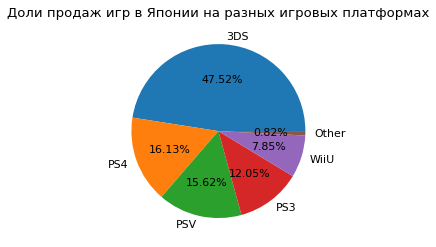

In [89]:
pie_eu_platf = plt.pie(top_5_jp_platform['part'], labels=top_5_jp_platform['platform'], autopct='%1.2f%%')
plt.title('Доли продаж игр в Японии на разных игровых платформах');

*Таким образом предпочтения игровых платформ у пользователей из Японии отличались от таковых у пользователей из Северной Америки и Европы. Для жителей Японии большей популярностью пользовались как стационарные так и портативные игровые приставки.  Самыми популярными были игры платформы  3DS (48%  от общего числа продаж) это новое поколение портативной приставки нинтендо, выпускаемой в Японии судя по всему эта игровая платформа пользуется максимальной популярностью только в Японии, так же японские PS4 (16%  от общего числа продаж), PS3 (12%  от общего числа продаж) и Nintendo Wii U (8% от общего числа продаж) и портативная PSV (16% от общего числа продаж)пользовались популярностью у пользователей из Японии. Примечательно что кроме перечисленных топ-5 платформ пользователи Японии практически не приобретали игры других игровых платформам.*

*То есть в отличии от жителей Северной Америки и Европы, пользователи из Японии предпочитают японские игровые платформы как для портативных так и для стационарных игровых приставок.*

#### Оценим популярность разных игровых жанров среди пользователей из Японии

In [90]:
pivot_jp_sales_genre = actual_period_data.pivot_table(index='genre', values= 'jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).reset_index()
top_5_jp_genre = pivot_jp_sales_genre.head(5)
top_5_jp_genre['part']=top_5_jp_genre['jp_sales']/total_jp*100
other_genre = {'genre':'Other', 'jp_sales':(total_jp - top_5_jp_genre['jp_sales'].sum()), 'part': (100-top_5_jp_genre['part'].sum())}
top_5_jp_genre = top_5_jp_genre.append(other_genre, ignore_index=True)
display(top_5_jp_genre)

,genre,jp_sales,part
0,Role-Playing,31.16,33.472983
1,Action,29.58,31.775701
2,Fighting,6.37,6.842840
3,Misc,5.61,6.026426
4,Shooter,4.87,5.231496
5,Other,15.50,16.650553


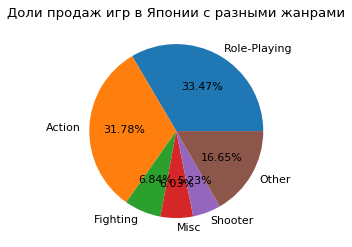

In [91]:
pie_jp_genre = plt.pie(top_5_jp_genre['part'], labels=top_5_jp_genre['genre'], autopct='%1.2f%%')
plt.title('Доли продаж игр в Японии с разными жанрами');

*Таким образом предпочтения игровых жаноров у пользователей из Японии отличается от пользователей из Северной Америки и Европы. Самыми популярными оказались ролевые игры (33% от общего числа продаж), дальше экшн (32% от общего числа продаж), дальше с большим отставанием файтинг (7% от общего числа продаж), музыкальные (6% от общего числа продаж), шутер (5% от общего числа продаж).
В Японии игры жанра стрелялки не так активно продавались как в Европе и Америке, зато куда более миролюбивые ролевые игры и экшн приносили гораздо больше продаж среди жанров.*

#### Оценим популярность игр разных рейтингов ESRB среди пользователей из Японии

Создадим сводную таблицу по суммарным продажам в Японии игр разных рейтингов ESRB. Выделим 5 самых популярных рейтингов ESRB и рассчитаем долю от общих продаж для каждой из рейтингов ESRB.

In [92]:
pivot_jp_sales_rating = actual_period_data.pivot_table(index='rating', values= 'jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).reset_index()
top_5_jp_rating = pivot_jp_sales_rating.head(5)
top_5_jp_rating['part']=top_5_jp_rating['jp_sales']/total_jp*100
other_rating = {'rating':'without', 'jp_sales':(total_jp - top_5_jp_rating['jp_sales'].sum()), 'part': (100-top_5_jp_rating['part'].sum())}
top_5_jp_rating = top_5_jp_rating.append(other_rating, ignore_index=True)
display(top_5_jp_rating)

,rating,jp_sales,part
0,T,14.78,15.877108
1,E,8.94,9.603609
2,M,8.01,8.604576
3,E10+,4.46,4.791062
4,without,56.90,61.123644


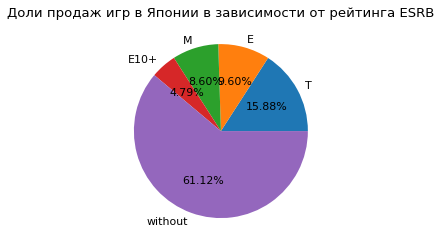

In [93]:
pie_jp_rating = plt.pie(top_5_jp_rating['part'], labels=top_5_jp_rating['rating'], autopct='%1.2f%%')
plt.title('Доли продаж игр в Японии в зависимости от рейтинга ESRB');

*Таким образом у пользователей из Японии наибольшей популярностью пользовались игры без рейтинга ESRB.  меньшую долю относительно пользователей из Северной Америки и Европы составили игры с от продаж составили  с рейтингом ESRB  M	(Mature) игры для взрослых (9% от общего числа продаж),  самыми популярными были из оцененных были игры Т («Teen») — «Подросткам» (16% от общего числа продаж), далее игры с рейтингом E («Everyone») — «Для всех» (10% от общего числа продаж), и E10+ («Everyone 10 and older») — «Для всех от 10 лет и старше» (5% от общего числа продаж).*

**Вывод по портретам пользователей из разных регионов**

Самые популярные игровые платформы в Северной Америке это: PlayStation 4 (PS4), Xbox One (XOne), Xbox 360 (X360), Nintendo 3DS (3DS) и PlayStation 3 (PS3). Топ 5 жанров в Северной Америке: стрелялки (shooter), экшн (action), спортивные (sports), ролевые игры (Role-Playing), музыкальные (misc). По рейтингам видно, что больше всего продаж у игр с рейтингом «для взрослых» (М), далее игры с рейтингом «Для всех» (E), «Для всех от 10 лет и старше» (E10+) и «Подросткам» (Т). И 23% продаж были у игр без опредленного рейтинга.


Самые популярные игровые платформы в Европе это: PlayStation 4 (PS4), Xbox One (XOne), PlayStation 3 (PS3),  персональные компьютеры (PC),  Nintendo 3DS (3DS), стоит отменить явное доминирование платформы PlayStation 4 которого не наблюдалось у жителей Северной Америки или Японии. Топ 5 жанров в Европе тот же что и в Северной Америке: экшн (action), стрелялки (shooter), музыкальные (misc), ролевые игры (Role-Playing), спортивные (sports). По рейтингам так же сохряняется распределение продаж по северо-американскому типу, что больше всего продаж у игр с рейтингом «для взрослых» (М), далее игры с рейтингом «Для всех» (E), «Для всех от 10 лет и старше» (E10+) и «Подросткам» (Т). И 22% продаж были у игр без опредленного рейтинга.


Самые популярные игровые платформы в Японии это: 2 поколения приставок нинтендо Nintendo 3DS (3DS) и  Nintendo Wii U , и игры для разные вариантов PlayStation - PlayStation 4 (PS4), PlayStation 3 (PS3) и портативная PlayStation Vitа (PSV). Топ 5 жанров в Японии : ролевые игры (Role-Playing) и экшн (action), дальше с большим отставанием файтинг, музыкальные (misc) и стрелялки (shooter). По рейтингам видно, что больше всего продаж у игр без  рейтинга ESRB, самыми популярными были из оцененных были игры «Подросткам» (Т) и игры с рейтингом «Для всех» (E). Организация ESRB является нгосударсвенной североамериканской и оценивает судя по всему игры популярные в Севереной америке и Европе и слабоориентирована на японского потребителя.

Таким образом если нашей задачей является выявить наиболее перспективный продукт для общемировой практики интернет-магазине «Стримчик» стоит сделать ставки на игры для игровых платформ  PlayStation 4 (PS4), жанр ирг - экшн (action), рейтинг ESRB - без рейтинга или «Для всех».

## Проверка гипотез <a id='Hypothesis_testing'></a>

Напишем функцию для удаления выбросов:

In [94]:
def delete_outliers(df, column, graphic=0, x = 10, y = 10):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    iqr_test = (df[column] >= (q1 - 1.5 * iqr)) & (df[column] <= (q3 + 1.5 * iqr))
    if graphic == 1:
        return df.loc[iqr_test].boxplot([column], figsize=(x,y))
    else:
        return df.loc[iqr_test]

### Проверка гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

Для проверки гипотезы об отсутствии различий средних пользовательских рейтингов платформ  Xbox One и PC будем использовать t-критерий Стьюдента для двух независимых выборок с помощью метода scipy.stats.ttest_ind().

**Сформулируем гипотезы:**

H0: средние пользовательские рейтинги платформ  Xbox One и PC равны;

H1: средние пользовательские рейтинги платформ  Xbox One и PC различаются.

In [95]:
pc = actual_period_data[actual_period_data['platform'] == 'PC']
xone = actual_period_data[actual_period_data['platform'] == 'XOne']

In [96]:
pc = pc.dropna()
xone = xone.dropna()

In [97]:
pc = delete_outliers(pc, 'user_score', 0)
pc_clean = pc['user_score']

In [98]:
xone = delete_outliers(xone, 'user_score', 0)
xone_clean = xone['user_score']

In [99]:
alpha = 0.05
results = st.ttest_ind(pc_clean, xone_clean)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


**Вывод:**
Значимых отличий между средними пользовательскими рейтингами платформ  Xbox One и PC не обнаружено.

### Проверка гипотезы "Средние пользовательские рейтинги жанров Action  и Sports разные".

Для проверки гипотезы о различии средних пользовательских рейтингов жанров Action и Sports так же будем использовать t-критерий Стьюдента для двух независимых выборок.

**Сформулируем гипотезы:**

H0: средние пользовательские рейтинги жанров Action и Sport равны;

H1: средние пользовательские рейтинги жанров Action и Sport различаются.

In [100]:
action = actual_period_data[actual_period_data['genre'] == 'Action']
action = delete_outliers(action, 'user_score', 0)
action = action['user_score']

In [101]:
sports = actual_period_data[actual_period_data['genre'] == 'Sports']
sports = delete_outliers(sports, 'user_score', 0)
sports = sports['user_score']

In [102]:
alpha = 0.05
results = st.ttest_ind(action, sports)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


**Вывод** 

Разница между средними выборок не случайна, есть значимые различия средний значений между пользовательские рейтинги жанров Action  и Sports (p<0,05).

## Общий вывод. <a id='conclusion'></a>

В изучаемой таблице данные за 1980-2016гг.

Согласно графику релиза игр мы видим возрастание количества релизов с 1994 по 2000гг, в этот период времени максимальный пик выпуска игр приходится на 2006-2011гг. Пики выхода новых игр ассоциированы с выпуском новых игровых платформ и сменами поколений игровых систем. К 2010-м годам игровым приставкам пришлось прямо конкурировать не только с персональными компьютерами, но со смартфонами, планшетами и телевизорами Smart TV, постоянно подключёнными к интернету. В целом это начало приводить к угасанию популярности десктопных вариантов игр и к развитию мобольных игр и плеймаркетов.

В ходе предобработки данных обнаружили большое количество пропусков данных о оценках критиков и пользователей, а так же рейтинге от организации ESRB, характерные для игр с низкими продажами. У некоторых игр в оценке пользователей была аббревиатура tbd (To Be Determined - будет определено), из-за этой буквенной аббревиатуры тип данных в колонке был object, заменили занчение tbd на пропуски Nan, после чего перевели данные в численный тип float64.

Для оценки продаж игр сделали в датасете дополнительную колонку с общеми продажами (total_sales). 

В топ-10 платформ по продажам игр за весь срок наблюдения вошли PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP и PC. В среднем для появления и исчезновения новой платформы нужно 5-8 лет. Из этого правила выбиваются  игры для персональных компьютеров у которых было несколько пиков продаж и которые сохраняют свою популярность на протяжении всего изучаемого срока.

Если говорить об актуальном сроке исследования для предположения продаж на 2017 год, то исходя из срока жизни платформы мы решили взять период за 2013-2016 года. Идальнейшие исследования проводить на данных этого периода времени.

В топ продаж за 2013-2016 года вошли PlayStation 3 и PlayStation 4, Xbox 360 и  Xbox One, Nintendo 3DS и Nintendo Wii. PS3, X360, Wii не смотря на то что приносили самые высокие продажи уже находятся на излете своей популярности. К потенциально прибыльным платформам отнесем более новые поколения PS4, 3DS, XOne и игры для персональных компьютеров, котрые не смотря на изменчивость своей популярности остаются актуальными.

Если говорить о взаимосвязи рейтинговых оценок пользователей и критиков и суммарных продаж игр, то продажи игр для PS4, XOne и PC связаны с оценками критиков, а продажи игр для 3DS связаны и с оценками критиков и с оценками пользователей.

В среднем лучше всего продавались шутер и спорт, игры жанра пазл продавались хуже всего. 

Если говорит об отдельных регионах, то для ползователей из **Северной Америки** самые популярные игровые платформы это:  PlayStation 4, Xbox One, Xbox 360, Nintendo 3DS и PlayStation 3. Топ 5 жанров: стрелялки, экшн, спортивные , ролевые игры, музыкальные. 

Для пользователей из **Европы** самые популярные игровые платформы это: PlayStation 4, Xbox One, PlayStation 3 ,  персональные компьютеры,  Nintendo 3DS . Топ 5 жанров в Европе тот же что и в Северной Америке: стрелялки, экшн, спортивные , ролевые игры, музыкальные. 

Для пользователей из **Японии** самые популярные игровые платформы это: 2 поколения нинтендо Nintendo 3DS и Wii U , и разные вариантов PlayStation - PlayStation 4 , PlayStation 3  и портативная PlayStation Vitа. Топ 5 жанров :  ролевые игры и экшн, дальше с большим отставанием файтинг, музыкальные и стрелялки. 

По рейтингам ESRB видно, что пользователи из Северной Америки и Европы предпочитают более "жестокие" игры с рейтингами для большего возраста - для взрослых (18+), для всех, для подростков (13+), для детей старше 10 лет. Тогда как для пользователей из Японии больше всего продаж игр с без рейтинга и с рейтингом для всех, собственно предпочтение более миролюбивых игр среди японцев можно проследить и по тем жанрам, которые они выбирают - ролевые игры, экшн, музыкальные, платформеры и приключения.

Потенциальная популярность игр жанра эксш так же подтверждена статистически, различия между средними оценками пользователей игр экшн и спорт статистичеки значимые (p<0,05).

Таким образом, можно сказать что потенциально прибыльным продуктом для интернет-магазине «Стримчик» являются игры жанра экшн для PlayStation 4, Xbox One и Nintendo 3DS, без рейтинга ESRB или с рейтингом «Для всех».